<a href="https://colab.research.google.com/github/SalvatoreMessina11/ARM-valuation/blob/main/ARM_RELATIVE_VALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 0) Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import t, norm
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore", message=".*kurtosistest.*")

In [ ]:
# Dizionario con tutti i dati
data = {
    "Company": ["NVDA","AVGO","TSM","QCOM","AMD","TXN","ARM","ADI","MU","MRVL",
                "IFX","MPWR","STMPA","GFS","ASEKY (7259)","UMC (6615)","ON","SWKS","IBM"],
    "Rev_2020": [10918,23888,1339254.8,23531,9763,14461,np.nan,5603.1,21435,2699.2,
                 8567,844.5,10219,4851,3784585,141010,5255,3355.7,55179],
    "Rev_2021": [16675,27450,1587415.0,33566,16434,18344,2027,7318.3,27705,2968.9,
                 11060,1207.8,12761,6585,3525799,136179,6739.8,5109.1,57351],
    "Rev_2022": [26914,33203,2263891.3,44200,23601,20028,2703,12014.0,30758,4462.4,
                 14218,1794.1,16128,8108,3917434,134550,8326.2,5485.5,60530],
    "Rev_2023": [26974,35819,2161735.8,35820,22680,17519,2679,12305.5,15540,5919.6,
                 16309,1821.1,17286,7392,4402823,161706,8253.0,4772.4,61860],
    "Rev_2024": [60922,51574,2894307.7,38962,25785,15641,3233,9427.2,25111,5507.7,
                 14955,2207.1,13269,6750,4909557,131289,7082.3,4178.0,62753],
    "Rev_2025": [130497,54529,3140917.7,42286,27750,16049,4007,9337.6,31323,5767.3,
                 14635,2386.8,12321,6786,4896104,130208,6665.3,3952.2,62832],
    "RD_2020": [2829,4968,109486,5975,1983,1530,np.nan,1050.5,2600,1080.4,
                1095,161.7,1548,476,205800,np.nan,642.9,464.1,6262],
    "RD_2021": [3924,4854,124734.8,7176,2845,1554,814,1296.1,2663,1072.7,
                1433,232.4,1723,478,189800,np.nan,655.0,532.3,6488],
    "RD_2022": [5268,4919,163262.2,8194,5005,1670,995,1700.5,3116,1424.2,
                1786,281.6,1901,482,194100,np.nan,600.2,617.9,6567],
    "RD_2023": [7339,5253,182370.2,8818,5872,1863,1133,1660.2,3114,1784.3,
                1976,275.7,2100,428,218600,np.nan,577.3,606.8,6775],
    "RD_2024": [8675,9310,204181.8,8893,6456,1959,1979,1487.9,3430,1896.2,
                1973,356.8,2080,496,225500,np.nan,612.7,631.7,7479],
    "RD_2025": [12914,9255,204181.8,9007,6659,1998,2071,1499.3,3539,1950.4,
                1990,368.0,2041,493,np.nan,np.nan,626.8,687.3,7629],
    "EBIT_2025": [81453,19155,1481266.5,11660,2856,5512,831,2016.5,6130,-8.5,
                  2402,612.6,1105,754,202942,2330,1348.1,623.4,10113],
    "TaxRate_2025":[13.3,26.1,16.7,5.2,20.0,10.4,-8.664,8.0,23.8,0.0,17.9,0.0,17.4,0.0,28.4,9.3,13.9,15.0,6.6],
    "Cash_2025":[43210,9307,2703090,13846,7310,5005,2825,2721.5,8215,1028.4,1687,1026.7,5959,2877,451690,13699,3012.5,1506.6,17465],
    "BVE_2025":[79327,69789,4601630,27728,57881,16406,6839,35070.5,48633,13427,17110,3267,17959,11104,2233264,19368,8048.9,5940.3,26952],
    "Debt_2025":[10270,66579,986980,14623,4731,12848,346,7619,15023,4343.1,5890,17.8,2762,1554,697295,33052,3652.8,1209.6,66835],
    "Beta":[2.11,1.06,1.32,1.29,1.97,0.96,np.nan,0.98,1.21,1.82,1.60,1.18,1.19,1.54,0.38,1.43,1.39,1.18,0.63],
    "Market_Cap":[3300612,1091416.3,25906800.5,167848.1,190871.7,170193.2,140655,112497.4,106526.9,56926.4,40872.4,35157.3,20790,22133.1,1394096.3,8723.3,18888.4,10845.3,234460.6],
    "Debt_2024":[11056,68916,1050091.1,15440,2321,14377,np.nan,8005.2,14078,4401.3,5168,15.8,3167,2321,794660,35826,3643.1,1200.4,58396],
    "BVE_2024":[42978,67678,4323575.9,26274,57568,16903,np.nan,35176.3,45131,14831.4,17219,3145.8,17679,10824,2402029,19715,8814.5,6336.7,27393],
    "Cash_2024":[25984,9348,2421812,13300,5132,7580,np.nan,2363.2,8106,950.8,2201,862.9,6184,3386,527191,10266,2991.3,1562.7,14591]
}
df = pd.DataFrame(data)

In [ ]:
#@title 1) Adjusting roic and omat
df_adj = df.copy()
rd_cols = [f"RD_{y}" for y in range(2020, 2026)]
df_adj[rd_cols] = df_adj[rd_cols].fillna(0)
num_cols = [c for c in df_adj.columns if c != "Company"]
df_adj[num_cols] = df_adj[num_cols].apply(pd.to_numeric, errors="coerce")

# 2) Adjusted NOPAT: EBIT*(1-tax) + RD corrente - media RD passati
tax_frac = df_adj["TaxRate_2025"] / 100
df_adj["Adjusted_NOPAT"] = (
    df_adj["EBIT_2025"] * (1 - tax_frac)
    + df_adj["RD_2025"]
    - df_adj[[f"RD_{y}" for y in range(2020, 2025)]].sum(axis=1) / 5
)

# 3) Adjusted Invested Capital 2024: Book equity + debt - cash + weighted RD storici
weights = np.array([1, 4/5, 3/5, 2/5, 1/5])
years = [2024, 2023, 2022, 2021, 2020]
df_adj["Adjusted_IC_2024"] = (
    df_adj["BVE_2024"] + df_adj["Debt_2024"] - df_adj["Cash_2024"]
    + (df_adj[[f"RD_{y}" for y in years]].values * weights).sum(axis=1)
)

# 4) Escludi ARM da questi adjusted
df_adj.loc[df_adj["Company"]=="ARM", ["Adjusted_NOPAT","Adjusted_IC_2024"]] = np.nan

# 5) Calcolo Adjusted OMAT & ROIC
# OMAT = Adjusted NOPAT / Rev 2025
# ROIC = Adjusted NOPAT / Adjusted Invested Capital 2024
df_adj["Adjusted_OMAT"] = df_adj["Adjusted_NOPAT"] / df_adj["Rev_2025"]
df_adj["Adjusted_ROIC"] = df_adj["Adjusted_NOPAT"] / df_adj["Adjusted_IC_2024"]

# 6) Price-to-Sales
# Market Cap / Rev 2025
df_adj["Price_to_Sales"] = df_adj["Market_Cap"] / df_adj["Rev_2025"]

df_adj.loc[df_adj['Company']=='ARM', 'Adjusted_OMAT'] = 0.6194

df_adj.loc[df_adj['Company']=='ARM', 'Adjusted_ROIC'] = 0.3541


In [ ]:
#@title 2) Print key metrics: EBIT, TaxRate, RD_2025, Amort_2025, Adjusted NOPAT, IC 2024 & IC 2025

# Calcolo Amort_2025: media RD 2020–2024
df_adj['Amort_2025'] = df_adj[[f"RD_{y}" for y in range(2020, 2025)]].sum(axis=1) / 5

# Stampa delle colonne richieste
print(df_adj[['Company',
              'EBIT_2025',
              'TaxRate_2025',
              'RD_2025',
              'Amort_2025',
              'Adjusted_NOPAT',
              'Adjusted_IC_2024']].round(4))

         Company  EBIT_2025  TaxRate_2025   RD_2025  Amort_2025  \
0           NVDA    81453.0        13.300   12914.0     5607.00   
1           AVGO    19155.0        26.100    9255.0     5860.80   
2            TSM  1481266.5        16.700  204181.8   156807.00   
3           QCOM    11660.0         5.200    9007.0     7811.20   
4            AMD     2856.0        20.000    6659.0     4432.20   
5            TXN     5512.0        10.400    1998.0     1715.20   
6            ARM      831.0        -8.664    2071.0      984.20   
7            ADI     2016.5         8.000    1499.3     1439.04   
8             MU     6130.0        23.800    3539.0     2984.60   
9           MRVL       -8.5         0.000    1950.4     1451.56   
10           IFX     2402.0        17.900    1990.0     1652.60   
11          MPWR      612.6         0.000     368.0      261.64   
12         STMPA     1105.0        17.400    2041.0     1870.40   
13           GFS      754.0         0.000     493.0      472.0


Beta ~ Drift — BP p-value: 0.4448
 → Homoscedasticity: OLS + t‐distribution CI
                            OLS Regression Results                            
Dep. Variable:                   Beta   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     8.834
Date:                Fri, 16 May 2025   Prob (F-statistic):            0.00899
Time:                        11:02:09   Log-Likelihood:                -5.9461
No. Observations:                  18   AIC:                             15.89
Df Residuals:                      16   BIC:                             17.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

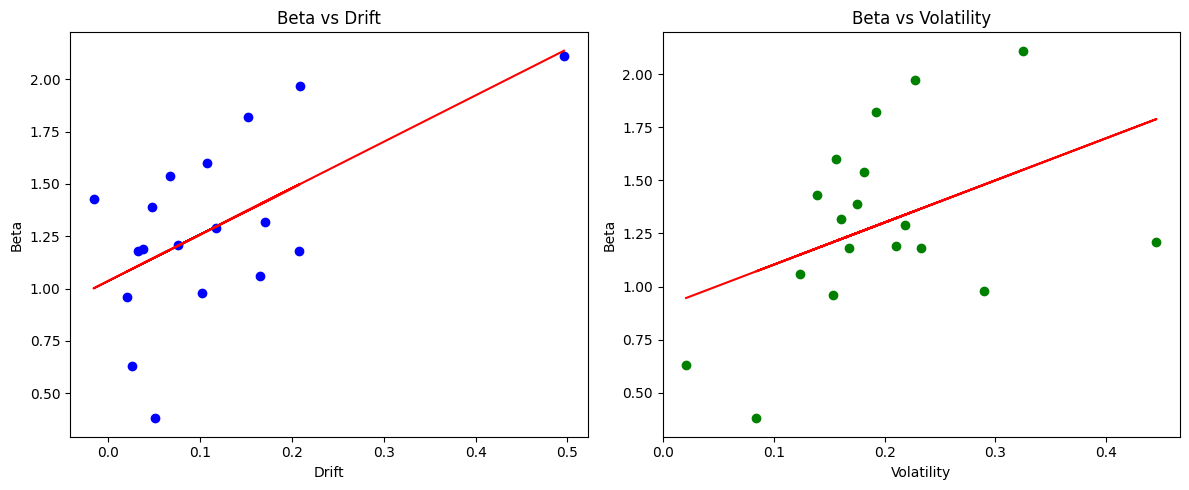

<ipython-input-21-e912ae466724>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z_s = r_m.params[0] + r_m.params[1]*X_s + r_m.params[2]*Y_s


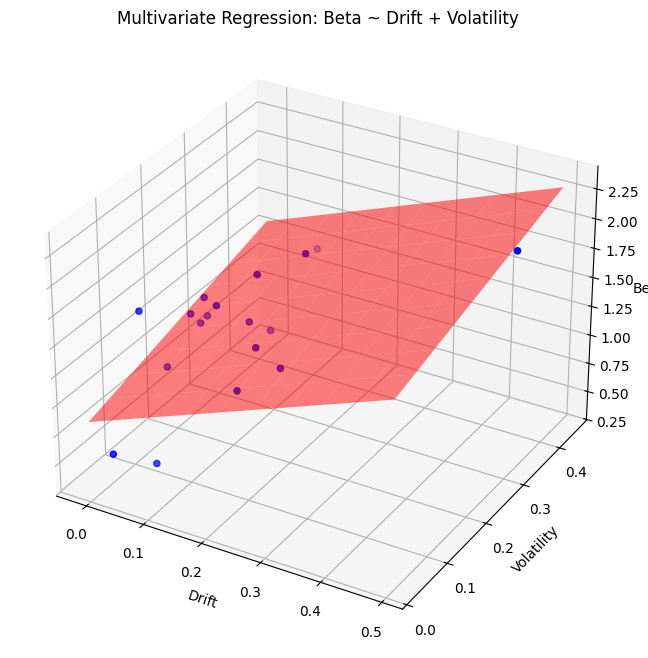

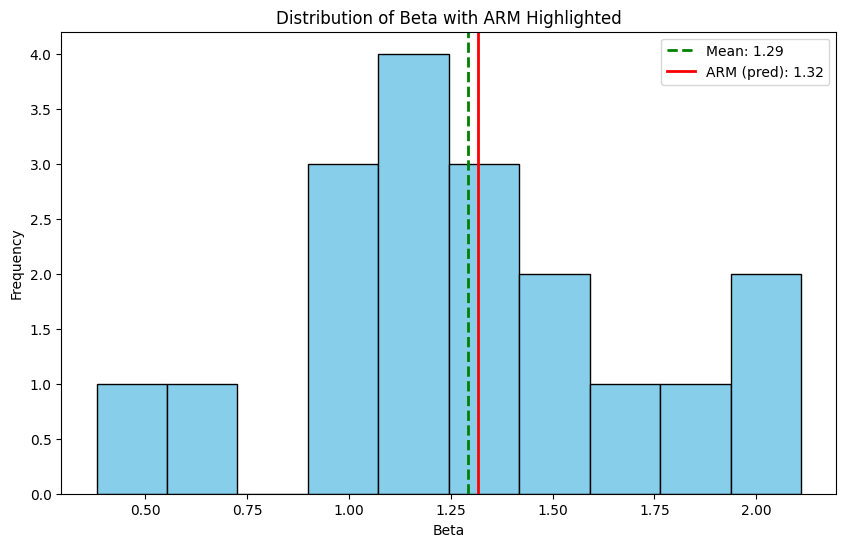

In [21]:
#@title 3) Beta Estimation & Regression with Plots and ARM Predictions
# Prepara Drift & Volatility
years = [2020,2021,2022,2023,2024,2025]
incs = [np.log(df[f'Rev_{years[i+1]}'] / df[f'Rev_{years[i]}']) for i in range(len(years)-1)]
df_inc = pd.concat(incs, axis=1)
df_inc.columns = [f'LogInc_{i+1}' for i in range(len(incs))]

df_final = pd.concat([df[['Company']].rename(columns={'Company':'Ticker'}), df_inc], axis=1)
df_final['Drift'] = df_inc.mean(axis=1)
df_final['Volatility'] = df_inc.std(axis=1)
df_final = df_final.merge(df[['Company','Beta']].rename(columns={'Company':'Ticker'}), on='Ticker', how='left')

# Dataset per le regressioni (esclude NA)
reg_df = df_final.dropna(subset=['Beta','Drift','Volatility'])

# Funzione di regressione con BP test e CI
def run_beta_reg(endog, exog, title):
    model = sm.OLS(endog, exog).fit()
    lm, pval, _, _ = het_breuschpagan(model.resid, model.model.exog)
    print(f"\n{title} — BP p-value: {pval:.4f}")
    if pval < 0.05:
        print(" → Heteroscedasticity: robust HC1 + normal‐CI")
        res = model.get_robustcov_results(cov_type='HC1')
        crit = norm.ppf(0.975)
    else:
        print(" → Homoscedasticity: OLS + t‐distribution CI")
        res = model
        crit = t.ppf(0.975, int(model.df_resid))
    print(res.summary())
    return model, res, crit

# Regressioni
X_drift = sm.add_constant(reg_df['Drift'])
m_d, r_d, c_d = run_beta_reg(reg_df['Beta'], X_drift, 'Beta ~ Drift')

X_vol = sm.add_constant(reg_df['Volatility'])
m_v, r_v, c_v = run_beta_reg(reg_df['Beta'], X_vol, 'Beta ~ Volatility')

X_mv = sm.add_constant(reg_df[['Drift','Volatility']])
m_m, r_m, c_m = run_beta_reg(reg_df['Beta'], X_mv, 'Beta ~ Drift + Volatility')

# Estrai valori ARM
drift_arm = df_final.loc[df_final['Ticker']=='ARM','Drift'].iloc[0]
vol_arm   = df_final.loc[df_final['Ticker']=='ARM','Volatility'].iloc[0]

# Predizioni ARM
arm_pred_drift = r_d.predict([1, drift_arm])[0]
arm_pred_vol   = r_v.predict([1, vol_arm])[0]
arm_pred_mv    = r_m.predict([1, drift_arm, vol_arm])[0]

# Grafici 2D
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(reg_df['Drift'], reg_df['Beta'], color='blue')
plt.plot(reg_df['Drift'], r_d.predict(X_drift), color='red')
plt.xlabel('Drift'); plt.ylabel('Beta'); plt.title('Beta vs Drift')

plt.subplot(1,2,2)
plt.scatter(reg_df['Volatility'], reg_df['Beta'], color='green')
plt.plot(reg_df['Volatility'], r_v.predict(X_vol), color='red')
plt.xlabel('Volatility'); plt.ylabel('Beta'); plt.title('Beta vs Volatility')
plt.tight_layout(); plt.show()

# Grafico 3D multivariato
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
x = reg_df['Drift']; y = reg_df['Volatility']; z = reg_df['Beta']
ax.scatter(x,y,z, color='blue')
X_s, Y_s = np.meshgrid(np.linspace(x.min(),x.max(),10), np.linspace(y.min(),y.max(),10))
Z_s = r_m.params[0] + r_m.params[1]*X_s + r_m.params[2]*Y_s
ax.plot_surface(X_s, Y_s, Z_s, alpha=0.5, color='red')
ax.set_xlabel('Drift'); ax.set_ylabel('Volatility'); ax.set_zlabel('Beta')
ax.set_title('Multivariate Regression: Beta ~ Drift + Volatility')
plt.show()

# Istogramma Beta con ARM evidenziata
beta_vals = reg_df['Beta'].tolist()
mean_b = np.mean(beta_vals)

plt.figure(figsize=(10,6))
# sky‐blue bars
plt.hist(beta_vals, bins=10, color='skyblue', edgecolor='black')
# green line for the mean
plt.axvline(mean_b, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_b:.2f}')
# red line for ARM prediction
plt.axvline(arm_pred_mv, color='red', linestyle='-', linewidth=2, label=f'ARM (pred): {arm_pred_mv:.2f}')
plt.title('Distribution of Beta with ARM Highlighted')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#@title 3.1) Tabella predizioni Beta per ARM

# Costruisci la tabella
arm_preds = pd.DataFrame({
    'Modello': [
        'Beta ~ Drift',
        'Beta ~ Volatility',
        'Beta ~ Drift + Volatility'
    ],
    'Predicted_Beta_ARM': [
        arm_pred_drift,
        arm_pred_vol,
        arm_pred_mv
    ]
})

# Stampa la tabella arrotondata a 4 decimali
print(arm_preds.round(4).to_string(index=False))

                  Modello  Predicted_Beta_ARM
             Beta ~ Drift              1.4139
        Beta ~ Volatility              1.1566
Beta ~ Drift + Volatility              1.3175


In [ ]:
#@title 4) Combined Metrics Table (with ARM percentages)

# 1) Ensure Adjusted OMAT & ROIC from Title 3 are in df_adj (ARM originally set NaN)
# Already computed in previous cells

# 2) Compute Price-to-Sales
df_adj["Price_to_Sales"] = df_adj["Market_Cap"] / df_adj["Rev_2025"]

# 3) Compute EV-to-Sales
df_adj["EV_to_Sales"] = (
    df_adj["Market_Cap"] + df_adj["Debt_2025"] - df_adj["Cash_2025"]
) / df_adj["Rev_2025"]

# 4) Merge Drift & Volatility from df_final
df_combo = (
    df_adj
    .rename(columns={"Company": "Ticker"})
    .merge(df_final[["Ticker", "Drift", "Volatility"]], on="Ticker", how="left")
)

# 5) Add Beta
df_combo["Beta"] = df_adj["Beta"].values

# 6) Insert ARM adjusted percentages manually
df_combo.loc[df_combo["Ticker"]=="ARM", "Adjusted_OMAT"] = 0.6194
df_combo.loc[df_combo["Ticker"]=="ARM", "Adjusted_ROIC"] = 0.3541

# 7) Display all requested columns
display(df_combo[[
    "Ticker",
    "Adjusted_ROIC",
    "Adjusted_OMAT",
    "Drift",
    "Volatility",
    "Price_to_Sales",
    "EV_to_Sales",
    "Beta"
]].round(4))


,Ticker,Adjusted_ROIC,Adjusted_OMAT,Drift,Volatility,Price_to_Sales,EV_to_Sales,Beta
0,NVDA,1.6271,0.5972,0.4962,0.3246,25.2926,25.0402,2.11
1,AVGO,0.1197,0.3218,0.1651,0.1235,20.0153,21.0656,1.06
2,TSM,0.3691,0.4079,0.1705,0.1609,8.2482,7.7018,1.32
3,QCOM,0.2296,0.2897,0.1172,0.2186,3.9694,3.9877,1.29
4,AMD,0.0640,0.1626,0.2089,0.2277,6.8783,6.7853,1.97
5,TXN,0.1796,0.3254,0.0208,0.1529,10.6046,11.0933,0.96
6,ARM,0.3541,0.6194,0.1704,0.1268,35.1023,34.4837,NaN
7,ADI,0.0422,0.2051,0.1021,0.2901,12.0478,12.5723,0.98
8,MU,0.0864,0.1668,0.0759,0.4453,3.4009,3.6183,1.21
9,MRVL,0.0212,0.0850,0.1518,0.1917,9.8705,10.4453,1.82


In [ ]:
#@title 5) Price-to-Sales Regressions (escludendo ARM)
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import t, norm

def auto_regression(df, y, Xvars, name):
    dfm = df.dropna(subset=[y] + Xvars)
    X = sm.add_constant(dfm[Xvars])
    yv = dfm[y]
    model = sm.OLS(yv, X).fit()
    lm, pval, _, _ = het_breuschpagan(model.resid, model.model.exog)
    print(f"\n{name} — BP p-value: {pval:.4f}")
    if pval < 0.05:
        print(" → Heteroscedasticity: robust errors + normal CIs")
        res = model.get_robustcov_results(cov_type='HC1')
        crit = norm.ppf(0.975)
        for i, param in enumerate(res.model.exog_names):
            coef = res.params[i]; se = res.bse[i]
            lower, upper = coef - crit*se, coef + crit*se
            print(f"{param:10s}: {coef:.4f} ± {crit:.2f}×{se:.4f} → [{lower:.4f}, {upper:.4f}]")
        print(res.summary())
    else:
        print(" → Homoscedasticity: OLS errors + t CIs")
        df_resid = int(model.df_resid)
        crit = t.ppf(0.975, df_resid)
        for param, coef, se in zip(model.params.index, model.params, model.bse):
            lower, upper = coef - crit*se, coef + crit*se
            print(f"{param:10s}: {coef:.4f} ± {crit:.2f}×{se:.4f} → [{lower:.4f}, {upper:.4f}]")
        print(model.summary())

# prepara Price-to-Sales e filtra fuori ARM
df_adj["Price_to_Sales"] = df_adj["Market_Cap"] / df_adj["Rev_2025"]
df_ps = df_adj[df_adj["Company"] != "ARM"]

# 5a) P/S ~ ROIC + OMAT + Beta
auto_regression(
    df_ps, "Price_to_Sales",
    ["Adjusted_ROIC", "Adjusted_OMAT", "Beta"],
    "P/S ~ ROIC + OMAT + Beta"
)

# ricostruisci Drift/Volatility e unisci, poi filtra ARM
years = [2020,2021,2022,2023,2024,2025]
inc = [np.log(df[f"Rev_{years[i+1]}"]/df[f"Rev_{years[i]}"]) for i in range(len(years)-1)]
df_inc = pd.concat(inc, axis=1)
df_inc.columns = [f"LogInc_{i+1}" for i in range(len(inc))]
df_final = pd.concat([df[["Company"]].rename(columns={"Company":"Ticker"}), df_inc], axis=1)
df_final["Drift"] = df_inc.mean(axis=1)
df_final["Volatility"] = df_inc.std(axis=1)
df_final = df_final.merge(df[["Company","Beta"]].rename(columns={"Company":"Ticker"}), on="Ticker")

df_combo = df_adj.rename(columns={"Company":"Ticker"}).merge(
    df_final[["Ticker","Drift","Volatility"]], on="Ticker"
)
df_combo = df_combo[df_combo["Ticker"] != "ARM"]

# 5b) P/S ~ ROIC + OMAT + Drift + Volatility
auto_regression(
    df_combo, "Price_to_Sales",
    ["Adjusted_ROIC", "Adjusted_OMAT", "Drift", "Volatility"],
    "P/S ~ ROIC + OMAT + Drift + Volatility"
)



P/S ~ ROIC + OMAT + Beta — BP p-value: 0.1116
 → Homoscedasticity: OLS errors + t CIs
const     : -0.9996 ± 2.14×4.2885 → [-10.1975, 8.1983]
Adjusted_ROIC: 1.5741 ± 2.14×5.4450 → [-10.1042, 13.2525]
Adjusted_OMAT: 34.1872 ± 2.14×12.7193 → [6.9071, 61.4673]
Beta      : 0.7489 ± 2.14×2.9217 → [-5.5176, 7.0154]
                            OLS Regression Results                            
Dep. Variable:         Price_to_Sales   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     8.565
Date:                Fri, 16 May 2025   Prob (F-statistic):            0.00177
Time:                        10:12:10   Log-Likelihood:                -50.653
No. Observations:                  18   AIC:                             109.3
Df Residuals:                      14   BIC:                             112.9
Df Model:                           3                    

In [ ]:
#@title 6) EV-to-Sales Regressions (escludendo ARM)
import warnings
warnings.filterwarnings("ignore", message=".*kurtosistest.*")
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# calcola EV e EV/S, poi filtra ARM
df_adj["EV"] = df_adj["Market_Cap"] + df_adj["Debt_2025"] - df_adj["Cash_2025"]
df_adj["EV_to_Sales"] = df_adj["EV"] / df_adj["Rev_2025"]
df_ev = df_adj[df_adj["Company"] != "ARM"]

# helper identico
def auto_regression(df, y_var, x_vars, title):
    dfm = df.dropna(subset=[y_var] + x_vars)
    X = sm.add_constant(dfm[x_vars])
    y = dfm[y_var]
    model = sm.OLS(y, X).fit()
    lm, pval, _, _ = het_breuschpagan(model.resid, model.model.exog)
    print(f"\n{title} — BP p-value: {pval:.4f}")
    if pval < 0.05:
        print(" → Heteroscedasticity detected: robust HC1 + normal‐CI")
        res = model.get_robustcov_results(cov_type='HC1')
    else:
        print(" → Homoscedasticity assumed: OLS + t‐CI")
        res = model
    print(res.summary())
    return model, res

# 6a) EV/S ~ Beta + Adjusted_OMAT + Adjusted_ROIC
auto_regression(
    df_ev, "EV_to_Sales",
    ["Beta", "Adjusted_OMAT", "Adjusted_ROIC"],
    "EV/S ~ Beta + Adjusted_OMAT + Adjusted_ROIC"
)

# ricostruisci df_combo con Drift/Volatility (senza ARM)
df_combo = df_ev.rename(columns={"Company":"Ticker"}).merge(
    df_final[["Ticker","Drift","Volatility"]], on="Ticker", how="left"
)
df_combo = df_combo[df_combo["Ticker"] != "ARM"]

# 6b) EV/S ~ Adjusted_OMAT + Adjusted_ROIC + Drift + Volatility
auto_regression(
    df_combo, "EV_to_Sales",
    ["Adjusted_OMAT", "Adjusted_ROIC", "Drift", "Volatility"],
    "EV/S ~ Adjusted_OMAT + Adjusted_ROIC + Drift + Volatility"
)



EV/S ~ Beta + Adjusted_OMAT + Adjusted_ROIC — BP p-value: 0.1284
 → Homoscedasticity assumed: OLS + t‐CI
                            OLS Regression Results                            
Dep. Variable:            EV_to_Sales   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     7.496
Date:                Fri, 16 May 2025   Prob (F-statistic):            0.00313
Time:                        10:12:18   Log-Likelihood:                -51.580
No. Observations:                  18   AIC:                             111.2
Df Residuals:                      14   BIC:                             114.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd83f26b390>,
 <statsmodels.regression.linear_model.OLSResults at 0x7fd83f27fc50>)

In [ ]:
#@title 7) Correlation Matrix (excluding ARM, including EV/Sales)
import pandas as pd

# Prepara df_combo con Drift & Volatility
df_combo = (
    df_adj
      .rename(columns={"Company": "Ticker"})
      .merge(df_final[["Ticker", "Drift", "Volatility"]], on="Ticker", how="left")
)

# Escludi ARM
df_combo = df_combo[df_combo["Ticker"] != "ARM"]

# Seleziona le colonne d’interesse
cols = [
    "Adjusted_ROIC",
    "Adjusted_OMAT",
    "Drift",
    "Volatility",
    "Price_to_Sales",
    "EV_to_Sales",
    "Beta"
]

# Calcola e stampa la matrice di correlazione
corr = df_combo[cols].corr().round(4)
print("\nCorrelation matrix (ARM excluded):")
print(corr)




Correlation matrix (ARM excluded):
                Adjusted_ROIC  Adjusted_OMAT   Drift  Volatility  \
Adjusted_ROIC          1.0000         0.8024  0.8479      0.3204   
Adjusted_OMAT          0.8024         1.0000  0.7531      0.2620   
Drift                  0.8479         0.7531  1.0000      0.3536   
Volatility             0.3204         0.2620  0.3536      1.0000   
Price_to_Sales         0.6821         0.8008  0.8057      0.2058   
EV_to_Sales            0.6573         0.7830  0.7818      0.1892   
Beta                   0.4635         0.3101  0.5964      0.4294   

                Price_to_Sales  EV_to_Sales    Beta  
Adjusted_ROIC           0.6821       0.6573  0.4635  
Adjusted_OMAT           0.8008       0.7830  0.3101  
Drift                   0.8057       0.7818  0.5964  
Volatility              0.2058       0.1892  0.4294  
Price_to_Sales          1.0000       0.9982  0.3080  
EV_to_Sales             0.9982       1.0000  0.2862  
Beta                    0.3080       0.28